In [147]:
import tensorflow as tf
import keras
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

In [148]:
BATCH_SIZE = 32
IMAGE_SIZE = 256
CHANNELS=3
EPOCHS=50


In [149]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "DataSet",
    seed=123,
    shuffle=True,
    image_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE
)

Found 1937 files belonging to 5 classes.


In [150]:
class_names = dataset.class_names
class_names

['Pepper__bell___Bacterial_spot',
 'Pepper__bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy']

In [151]:
for image_batch, labels_batch in dataset.take(1):
    print(image_batch.shape)
    print(labels_batch.numpy())

(32, 256, 256, 3)
[2 4 1 0 0 2 3 3 2 0 0 1 0 3 3 1 1 3 3 2 3 2 0 0 0 0 0 1 1 3 2 4]


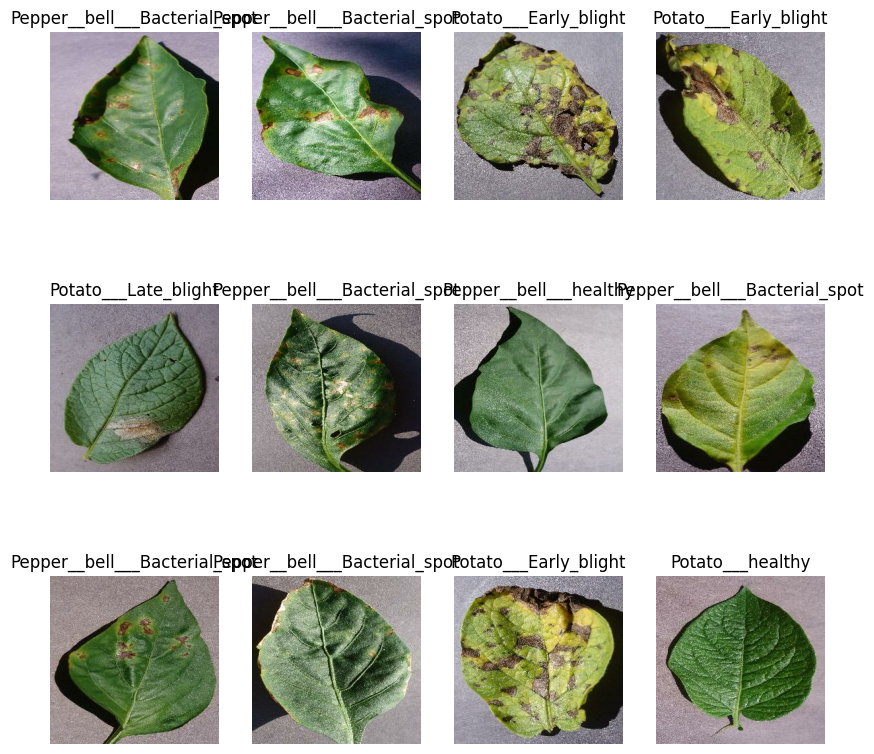

In [152]:
plt.figure(figsize=(10, 10))
for image_batch, labels_batch in dataset.take(1):
    for i in range(12):
        ax = plt.subplot(3, 4, i + 1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[labels_batch[i]])
        plt.axis("off")

In [153]:
train_size = 0.8
len(dataset)*train_size

48.800000000000004

In [154]:
def get_dataset_partitions_tf(ds, train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_size=10000):
    assert (train_split + test_split + val_split) == 1
    
    ds_size = len(ds)
    
    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=12)
    
    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)
    
    train_ds = ds.take(train_size)    
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)
    
    return train_ds, val_ds, test_ds

In [155]:
train_ds, val_ds, test_ds = get_dataset_partitions_tf(dataset)

In [156]:
len(train_ds)

48

In [157]:
len(val_ds)


6

In [158]:
len(test_ds)


7

In [159]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [160]:
resize_and_rescale= tf.keras.Sequential([
tf.keras.layers.experimental.preprocessing.Resizing(IMAGE_SIZE,IMAGE_SIZE),
tf.keras.layers.experimental.preprocessing.Rescaling(1.0/255)])


In [161]:
data_augmentation = tf.keras.Sequential([
  layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
  layers.experimental.preprocessing.RandomRotation(0.2),
])

In [162]:
input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 5

model = models.Sequential([
    resize_and_rescale,
    layers.Conv2D(32, kernel_size = (3,3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])

model.build(input_shape=input_shape)

In [163]:
model.summary()


Model: "sequential_24"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_22 (Sequential)  (32, 256, 256, 3)         0         
                                                                 
 conv2d_48 (Conv2D)          (32, 254, 254, 32)        896       
                                                                 
 max_pooling2d_48 (MaxPoolin  (32, 127, 127, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_49 (Conv2D)          (32, 125, 125, 64)        18496     
                                                                 
 max_pooling2d_49 (MaxPoolin  (32, 62, 62, 64)         0         
 g2D)                                                            
                                                                 
 conv2d_50 (Conv2D)          (32, 60, 60, 64)        

In [164]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)


In [165]:
history = model.fit(
    train_ds,
    batch_size=BATCH_SIZE,
    validation_data=val_ds,
    verbose=1,
    epochs=50,
)

Epoch 1/50
48/48 [==============================] - 66s 1s/step - loss: 1.5346 - accuracy: 0.2551 - val_loss: 1.3626 - val_accuracy: 0.3906
Epoch 2/50
48/48 [==============================] - 63s 1s/step - loss: 1.2288 - accuracy: 0.4734 - val_loss: 0.9969 - val_accuracy: 0.5885
Epoch 3/50
48/48 [==============================] - 65s 1s/step - loss: 0.8400 - accuracy: 0.6923 - val_loss: 0.7785 - val_accuracy: 0.6875
Epoch 4/50
48/48 [==============================] - 62s 1s/step - loss: 0.6336 - accuracy: 0.7581 - val_loss: 0.5460 - val_accuracy: 0.8229
Epoch 5/50
48/48 [==============================] - 64s 1s/step - loss: 0.4125 - accuracy: 0.8560 - val_loss: 0.2638 - val_accuracy: 0.8906
Epoch 6/50
48/48 [==============================] - 68s 1s/step - loss: 0.2860 - accuracy: 0.8968 - val_loss: 0.1712 - val_accuracy: 0.9583
Epoch 7/50
48/48 [==============================] - 65s 1s/step - loss: 0.2164 - accuracy: 0.9316 - val_loss: 0.1358 - val_accuracy: 0.9479
Epoch 8/50
48/48 [==

In [172]:
scores = model.evaluate(test_ds)

7/7 [==============================] - 2s 217ms/step - loss: 0.0219 - accuracy: 0.9955


In [173]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

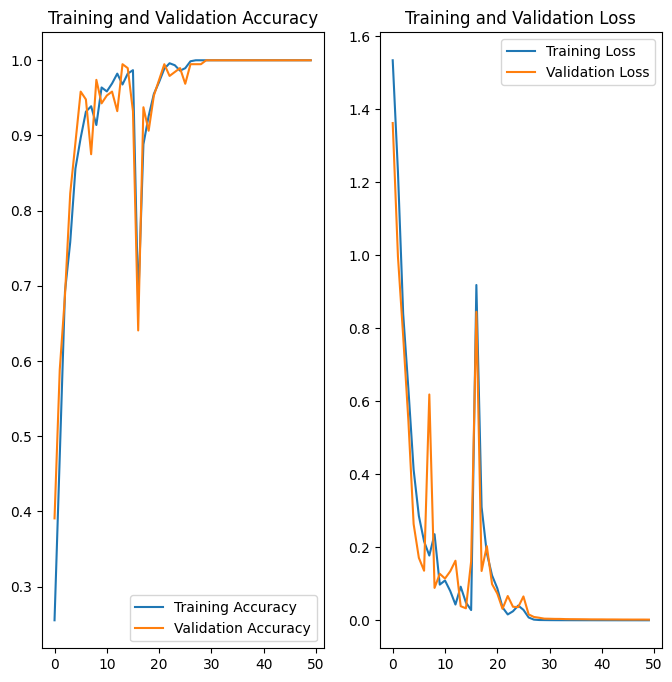

In [174]:
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

first image to predict
actual label: Potato___Early_blight
1/1 [==============================] - 0s 226ms/step
predicted label: Potato___Early_blight


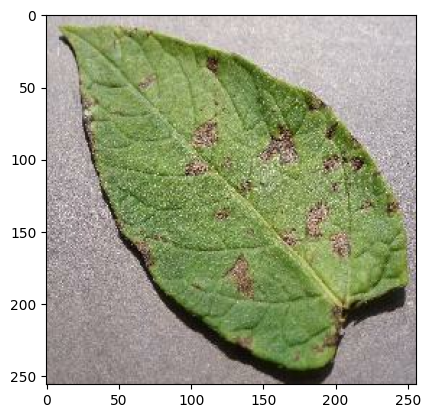

In [175]:
import numpy as np
for images_batch, labels_batch in test_ds.take(1):
    
    first_image = images_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0].numpy()
    
    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",class_names[first_label])
    
    batch_prediction = model.predict(images_batch)
    print("predicted label:",class_names[np.argmax(batch_prediction[0])])

In [176]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

1/1 [==============================] - 0s 29ms/step


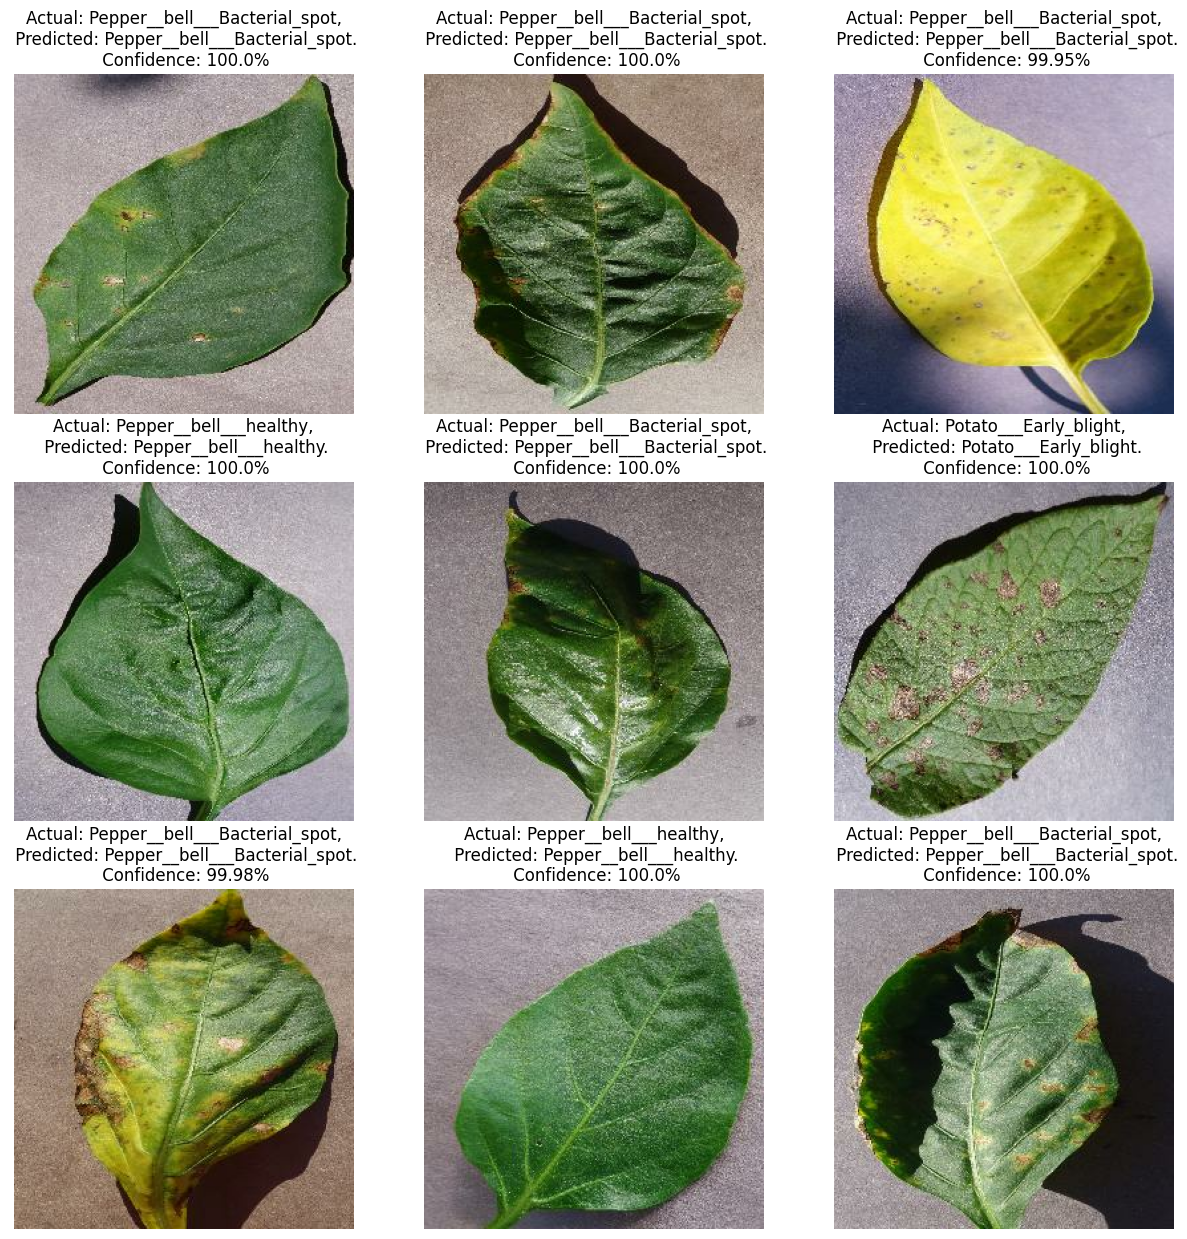

In [179]:
plt.figure(figsize=(15, 15))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        
        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")